In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing as proc

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.svm import SVC

pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('carclaims.csv')
print(df.shape)
df.head()

(15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [3]:
X = df.drop(['PolicyNumber', 'FraudFound'], axis=1)
y = df['FraudFound']
print(X.shape, y.shape)
X.head()

(15420, 31) (15420,)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42,
                                                   stratify=y)
X_train.shape, X_test.shape

((12336, 31), (3084, 31))

In [5]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [6]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

Fraud ratio: 1.1997%
Fraud count: 738


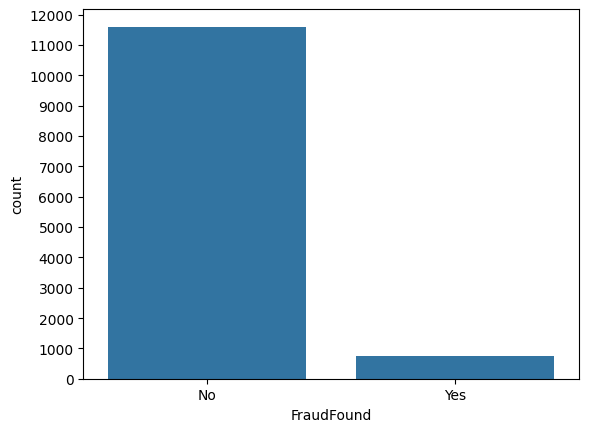

In [7]:
sns.countplot(x=y_train)
fraud_ratio = round((y_test == 'Yes').sum() / len(df) * 100, ndigits=4)
plt.yticks(np.arange(0, 13000, 1000))
print(f'Fraud ratio: {fraud_ratio}%')
print(f'Fraud count: {(y_train == "Yes").sum()}')

The wide imbalance warrants resampling. In this manner, random oversampling (ROS) will be used.

From the study of Pérez, et. al, (2022): FS+ROS is the best balancing configuration when using (Random Forest) RF as the classifier. [Link to the paper](https://www.sciencedirect.com/science/article/pii/S0957417421013622#:~:text=Some%20general%20conclusions%20of%20the,better%20results%20when%20applied%20afterwards.)

"RF: The balancing configuration FS+ROS in the area plots, and FS+RUS in the average ranks, showed better performance than the others. Unlike C4.5, the rankings showed that no use of balancing was by far the worst combination, a behavior also supported by the results of a previous study (Pes, 2020)."

"On the contrary, the results suggest that, in general, SMOTE and ROS perform better if applied after feature selection."

Feature selection will be conducted to find the best set of features. Based on the same study: ANOVA as the feature selector yields a viable percentage of victories for FS+ROS compared to other selectors.

SVM will be tested with SelectFromModel alongside the ANOVA selectors to compare the differences of available features when it comes to the differences of weights vs the variances with f-value.

In [8]:
TEMP_SIN_COS = ['Month', 'MonthClaimed', 'DayOfWeek', 'DayOfWeekClaimed', 'WeekOfMonth', 'WeekOfMonthClaimed']

AGE = ['Age']

ONE_HOT_NUMERICAL = ['RepNumber', 'Year']
ONE_HOT_CATEGORICAL = ['Make', 'PolicyType', 'MaritalStatus', 'VehicleCategory',
                       'BasePolicy', 'AgentType', 'WitnessPresent', 
                       'PoliceReportFiled', 'Fault', 'Sex', 'AccidentArea']

"""ORDINAL_CATEGORICAL = ['AgeOfVehicle', 'AgeOfPolicyHolder', 'VehiclePrice',
                       'Days:Policy-Accident', 'NumberOfCars', 'AddressChange-Claim',
                       'NumberOfSuppliments', 'PastNumberOfClaims', 'Days:Policy-Claim']
                       """

DEDUCTIBLE = ['Deductible']
AGE_OF_VEH_VAR = ['AgeOfVehicle']
AGE_OF_POL_VAR = ['AgeOfPolicyHolder']
VEH_PRICE_VAR = ['VehiclePrice']
DAYS_ACC_VAR = ['Days:Policy-Accident']
NUM_CAR_VAR = ['NumberOfCars']
ADD_CHANGE_VAR = ['AddressChange-Claim']
NUM_SUPP_VAR = ['NumberOfSuppliments']
PAST_CLAIM_VAR = ['PastNumberOfClaims']
DAYS_CLAIM_VAR = ['Days:Policy-Claim']

MONTH_MAP = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
DAY_MAP = {'Sunday': 6, 'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5}
DEDUCTIBLE_MAP = {300: 1, 400: 2, 500: 3, 700: 4}
AGE_OF_VEH_MAP = {'new': 8, '2 years': 7, '3 years': 6, '4 years': 5,
                  '5 years': 4, '6 years': 3, '7 years': 2, 'more than 7': 1}
AGE_OF_POL_MAP = {'16 to 17': 1, '18 to 20': 2, '21 to 25': 3, '26 to 30': 4,
                  '31 to 35': 5, '36 to 40': 6, '41 to 50': 7, '51 to 65': 8,
                  'over 65': 9}
VEH_PRICE_MAP = {'less than 20,000': 1, '20,000 to 29,000': 2,
                 '30,000 to 39,000': 3, '40,000 to 59,000': 4,
                 '60,000 to 69,000': 5, 'more than 69,000': 6}
DAYS_ACC_MAP = {'none': 1, '1 to 7': 2, '8 to 15': 3, '15 to 30': 4, 'more than 30': 5}
NUM_CAR_MAP = {'1 vehicle': 1, '2 vehicles': 2, '3 to 4': 3, '5 to 8': 4, 'more than 8': 5}
ADD_CHANGE_MAP = {'no change': 1, 'under 6 months': 2, '1 year': 3,
                  '2 to 3 years': 4, '4 to 8 years': 5}
NUM_SUPP_MAP = {'none': 1, '1 to 2': 2, '3 to 5': 3, 'more than 5': 4}
PAST_CLAIM_MAP = {'none': 1, '1': 2, '2 to 4': 3, 'more than 4': 4}
DAYS_CLAIM_MAP = {'none':1, '8 to 15': 2, '15 to 30': 3, 'more than 30': 4}

In [9]:
for feature in TEMP_SIN_COS:
    if feature == 'MonthClaimed' or feature == 'Month':
        X_train[feature] = X_train[feature].replace('0', 'Jan')
        X_train[feature] = X_train[feature].map(MONTH_MAP)
        X_train[feature+'_sin'] = np.sin(2 * np.pi * X_train[feature] / 12)
        X_train[feature+'_cos'] = np.cos(2 * np.pi * X_train[feature] / 12)

        X_test[feature] = X_test[feature].replace('0', 'Jan')
        X_test[feature] = X_test[feature].map(MONTH_MAP)
        X_test[feature+'_sin'] = np.sin(2 * np.pi * X_test[feature] / 12)
        X_test[feature+'_cos'] = np.cos(2 * np.pi * X_test[feature] / 12)
    if feature == 'DayOfWeekClaimed' or feature == 'DayOfWeek':
        X_train[feature] = X_train[feature].replace('0', 'Monday')
        X_train[feature] = X_train[feature].map(DAY_MAP)
        X_train[feature+'_sin'] = np.sin(2 * np.pi * X_train[feature] / 7)
        X_train[feature+'_cos'] = np.cos(2 * np.pi * X_train[feature] / 7)

        X_test[feature] = X_test[feature].replace('0', 'Monday')
        X_test[feature] = X_test[feature].map(DAY_MAP)
        X_test[feature+'_sin'] = np.sin(2 * np.pi * X_test[feature] / 7)
        X_test[feature+'_cos'] = np.cos(2 * np.pi * X_test[feature] / 7)
    if feature == 'WeekOfMonthClaimed' or feature == 'WeekOfMonth':
        X_train[feature+'_sin'] =  np.sin(2 * np.pi * X_train[feature] / 5)
        X_train[feature+'_cos'] =  np.cos(2 * np.pi * X_train[feature] / 5)

        X_test[feature+'_sin'] = np.sin(2 * np.pi * X_test[feature] / 5)
        X_test[feature+'_cos'] =  np.cos(2 * np.pi * X_test[feature] / 5)

In [10]:
X_train.drop(columns=TEMP_SIN_COS, inplace=True)
X_test.drop(columns=TEMP_SIN_COS, inplace=True)

In [11]:
from scipy import stats

mean_train = X_train[X_train['Age'] > 0]['Age'].mean()
mean_test = X_test[X_test['Age'] > 0]['Age'].mean()

for feature in AGE:
    X_train[feature] = X_train[feature].apply(lambda z: mean_train if z <=0 else z)
    X_test[feature] = X_test[feature].apply(lambda z: mean_test if z <=0 else z)
    
    X_train[feature], _ = stats.boxcox(X_train[feature])
    X_test[feature], _ = stats.boxcox(X_test[feature])

In [12]:
X_train.head()

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,Month_sin,Month_cos,MonthClaimed_sin,MonthClaimed_cos,DayOfWeek_sin,DayOfWeek_cos,DayOfWeekClaimed_sin,DayOfWeekClaimed_cos,WeekOfMonth_sin,WeekOfMonth_cos,WeekOfMonthClaimed_sin,WeekOfMonthClaimed_cos
0,Honda,Urban,Male,Single,2.575089,Third Party,Sedan - Collision,Sedan,"20,000 to 29,000",6,400,4,more than 30,more than 30,2 to 4,6 years,26 to 30,Yes,No,External,more than 5,no change,1 vehicle,1995,Collision,-1.0,-1.836970e-16,-1.000000e+00,-1.836970e-16,-0.433884,-0.900969,0.781831,0.623490,-0.587785,-0.809017,-5.877853e-01,-0.809017
1,Pontiac,Urban,Male,Married,2.828606,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,400,1,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1995,Liability,-0.5,-8.660254e-01,-5.000000e-01,-8.660254e-01,-0.974928,-0.222521,0.781831,0.623490,-0.587785,-0.809017,-5.877853e-01,-0.809017
2,VW,Urban,Male,Married,3.002641,Policy Holder,Sedan - Collision,Sedan,"40,000 to 59,000",6,400,4,more than 30,more than 30,2 to 4,7 years,36 to 40,No,No,External,none,no change,3 to 4,1996,Collision,-0.5,-8.660254e-01,-5.000000e-01,-8.660254e-01,0.433884,-0.900969,0.433884,-0.900969,0.587785,-0.809017,5.877853e-01,-0.809017
3,Pontiac,Urban,Male,Married,2.930283,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",13,400,1,more than 30,more than 30,2 to 4,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1996,Liability,-0.5,8.660254e-01,-2.449294e-16,1.000000e+00,0.433884,-0.900969,0.974928,-0.222521,-0.587785,-0.809017,-5.877853e-01,-0.809017
4,Honda,Urban,Male,Single,2.704286,Policy Holder,Sedan - All Perils,Sedan,"less than 20,000",13,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1995,All Perils,0.5,8.660254e-01,5.000000e-01,8.660254e-01,0.781831,0.623490,-0.433884,-0.900969,-0.587785,-0.809017,-2.449294e-16,1.000000


In [13]:
FEATURES_TO_SCALE = ['remainder__Age', 'remainder__DriverRating', 'deduct__Deductible', 'age_veh__AgeOfVehicle', 'age_pol__AgeOfPolicyHolder', 
                     'veh_price__VehiclePrice', 'day_acc__Days:Policy-Accident', 'num_car__NumberOfCars', 'add_change__AddressChange-Claim', 
                     'num_supp__NumberOfSuppliments', 'past_claim__PastNumberOfClaims', 'day_claim__Days:Policy-Claim']

In [14]:
ONE_HOT_CATEGORICAL+ONE_HOT_NUMERICAL

['Make',
 'PolicyType',
 'MaritalStatus',
 'VehicleCategory',
 'BasePolicy',
 'AgentType',
 'WitnessPresent',
 'PoliceReportFiled',
 'Fault',
 'Sex',
 'AccidentArea',
 'RepNumber',
 'Year']

In [15]:
col_transform = ColumnTransformer(
    transformers=[
    ('hot_cat', OneHotEncoder(sparse_output=False), ONE_HOT_CATEGORICAL),
    ('hot_num', OneHotEncoder(sparse_output=False), ONE_HOT_NUMERICAL),
    ('deduct', proc.MapTransform(variable=DEDUCTIBLE, mappings=DEDUCTIBLE_MAP), DEDUCTIBLE),
    ('age_veh', proc.MapTransform(variable=AGE_OF_VEH_VAR, mappings=AGE_OF_VEH_MAP), AGE_OF_VEH_VAR),
    ('age_pol', proc.MapTransform(variable=AGE_OF_POL_VAR, mappings=AGE_OF_POL_MAP), AGE_OF_POL_VAR),
    ('veh_price', proc.MapTransform(variable=VEH_PRICE_VAR, mappings=VEH_PRICE_MAP), VEH_PRICE_VAR),
    ('day_acc', proc.MapTransform(variable=DAYS_ACC_VAR, mappings=DAYS_ACC_MAP), DAYS_ACC_VAR),
    ('num_car', proc.MapTransform(variable=NUM_CAR_VAR, mappings=NUM_CAR_MAP), NUM_CAR_VAR),
    ('add_change', proc.MapTransform(variable=ADD_CHANGE_VAR, mappings=ADD_CHANGE_MAP), ADD_CHANGE_VAR),
    ('num_supp', proc.MapTransform(variable=NUM_SUPP_VAR, mappings=NUM_SUPP_MAP), NUM_SUPP_VAR),
    ('past_claim', proc.MapTransform(variable=PAST_CLAIM_VAR, mappings=PAST_CLAIM_MAP), PAST_CLAIM_VAR),
    ('day_claim', proc.MapTransform(variable=DAYS_CLAIM_VAR, mappings=DAYS_CLAIM_MAP), DAYS_CLAIM_VAR),
    ], remainder='passthrough'
).set_output(transform='pandas')

scale_transform = ColumnTransformer(
    transformers=[
        ('scaler', MinMaxScaler(), FEATURES_TO_SCALE)
    ], remainder='passthrough'
)

In [16]:
svc_pipeline = Pipeline(
    steps=[
    ('transform', col_transform),
    ('scale', scale_transform)
])

anova_pipeline = Pipeline(
    steps=[
    ('transform', col_transform),
    ('scale', scale_transform)
])

In [18]:
X_train_svc = svc_pipeline.fit_transform(X_train)
X_test_svc = svc_pipeline.transform(X_test)
X_train_anova = anova_pipeline.fit_transform(X_train)
X_test_anova = anova_pipeline.transform(X_test)

In [19]:
X_train_svc

array([[ 0.24409442,  1.        ,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.49442832,  0.        ,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.6662775 ,  1.        ,  0.33333333, ..., -0.80901699,
         0.58778525, -0.80901699],
       ...,
       [ 0.60989818,  0.        ,  0.33333333, ..., -0.80901699,
         0.58778525, -0.80901699],
       [ 0.39408641,  0.33333333,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.32398972,  0.33333333,  0.33333333, ..., -0.80901699,
        -0.95105652,  0.30901699]], shape=(12336, 93))

In [20]:
X_train_anova

array([[ 0.24409442,  1.        ,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.49442832,  0.        ,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.6662775 ,  1.        ,  0.33333333, ..., -0.80901699,
         0.58778525, -0.80901699],
       ...,
       [ 0.60989818,  0.        ,  0.33333333, ..., -0.80901699,
         0.58778525, -0.80901699],
       [ 0.39408641,  0.33333333,  0.33333333, ..., -0.80901699,
        -0.58778525, -0.80901699],
       [ 0.32398972,  0.33333333,  0.33333333, ..., -0.80901699,
        -0.95105652,  0.30901699]], shape=(12336, 93))

#### Target

In [21]:
svc_label_bin = LabelEncoder()
anova_label_bin = LabelEncoder()

y_train_svc = svc_label_bin.fit_transform(y_train)
y_test_svc = svc_label_bin.transform(y_test)
y_train_anova = anova_label_bin.fit_transform(y_train)
y_test_anova = anova_label_bin.transform(y_test)

#### Feature selection test

#### SVC

In [22]:
svc_selector = SelectFromModel(SVC(kernel='linear', probability=True, random_state=42))
svc_selector.fit(X_train_svc, y_train_svc)

SelectFromModel(estimator=SVC(kernel='linear', probability=True,
                              random_state=42))

In [23]:
X_train_svc.shape

(12336, 93)

In [24]:
print(svc_selector.get_support().sum())
svc_features = col_transform.get_feature_names_out()
np.array(svc_features)[svc_selector.get_support()]

26


array(['hot_cat__Make_Accura', 'hot_cat__Make_Chevrolet',
       'hot_cat__Make_Dodge', 'hot_cat__Make_Ferrari',
       'hot_cat__Make_Honda', 'hot_cat__Make_Jaguar',
       'hot_cat__Make_Lexus', 'hot_cat__Make_Mercury',
       'hot_cat__Make_Pontiac', 'hot_cat__Make_Porche',
       'hot_cat__Make_Saab', 'hot_cat__PolicyType_Sport - Collision',
       'hot_cat__PolicyType_Sport - Liability',
       'hot_cat__MaritalStatus_Widow', 'hot_cat__VehicleCategory_Sedan',
       'hot_cat__VehicleCategory_Sport',
       'hot_cat__VehicleCategory_Utility',
       'hot_cat__BasePolicy_Liability', 'hot_cat__AgentType_External',
       'hot_cat__AgentType_Internal', 'hot_cat__WitnessPresent_No',
       'hot_cat__PoliceReportFiled_Yes', 'hot_cat__AccidentArea_Rural',
       'hot_num__RepNumber_3', 'hot_num__RepNumber_4',
       'num_car__NumberOfCars'], dtype=object)

In [25]:
svc_selected = len(np.array(svc_features)[svc_selector.get_support()])

print(f'total features: {len(svc_selector.get_support())}')
print(f'selected features: {svc_selected}')
print(f'features with coef shrank to 0: {np.sum(svc_selector.estimator_.coef_ == 0)}')

total features: 93
selected features: 26
features with coef shrank to 0: 6


From total of 35 features in the original data, feature columns went up to 99 because of OneHotEncoding by ColumnTransformer. Out of the 99 total features, only 26 specifications were selected by SVC.

#### ANOVA

In [26]:
anova_selector = SelectKBest(f_classif, k='all')
anova_selector.fit(X_train_anova, y_train_anova)

SelectKBest(k='all')

In [27]:
X_train_anova.shape

(12336, 93)

In [28]:
print(anova_selector.get_support().sum())
anova_features = col_transform.get_feature_names_out()
anova_features

93


array(['hot_cat__Make_Accura', 'hot_cat__Make_BMW',
       'hot_cat__Make_Chevrolet', 'hot_cat__Make_Dodge',
       'hot_cat__Make_Ferrari', 'hot_cat__Make_Ford',
       'hot_cat__Make_Honda', 'hot_cat__Make_Jaguar',
       'hot_cat__Make_Lexus', 'hot_cat__Make_Mazda',
       'hot_cat__Make_Mecedes', 'hot_cat__Make_Mercury',
       'hot_cat__Make_Nisson', 'hot_cat__Make_Pontiac',
       'hot_cat__Make_Porche', 'hot_cat__Make_Saab',
       'hot_cat__Make_Saturn', 'hot_cat__Make_Toyota', 'hot_cat__Make_VW',
       'hot_cat__PolicyType_Sedan - All Perils',
       'hot_cat__PolicyType_Sedan - Collision',
       'hot_cat__PolicyType_Sedan - Liability',
       'hot_cat__PolicyType_Sport - All Perils',
       'hot_cat__PolicyType_Sport - Collision',
       'hot_cat__PolicyType_Sport - Liability',
       'hot_cat__PolicyType_Utility - All Perils',
       'hot_cat__PolicyType_Utility - Collision',
       'hot_cat__PolicyType_Utility - Liability',
       'hot_cat__MaritalStatus_Divorced',
      

In [29]:
print('feature importance: ', anova_selector.scores_)

feature importance:  [3.69130128e+00 5.93102862e-02 1.24058978e+01 1.15705977e+01
 9.55936424e+00 1.17965053e+01 1.07552380e+01 5.76235306e-01
 8.51395150e+00 1.78239686e+01 3.89192967e+01 4.18618388e+00
 3.02438566e+01 1.18003309e-01 5.62605007e-01 3.45337109e+00
 1.27264634e-01 2.08017188e+00 9.92856696e-02 2.54573176e-01
 6.36268302e-02 2.14595726e+00 1.27264634e-01 2.28288138e-01
 1.09455630e-01 9.96557186e-01 2.54573176e-01 5.69438914e+00
 4.33975864e+00 4.78915873e-02 7.74690781e+00 1.27951282e+02
 1.06391272e+01 2.91971370e+02 1.14696427e+00 2.21119361e+01
 6.36268302e-02 2.63161248e+01 2.36238908e-01 1.14696427e+00
 2.17099291e-01 1.83557533e-01 2.23506231e-01 9.76645265e-02
 1.84308205e+02 2.36063327e+02 2.16869748e+01 1.59018592e+02
 2.20640477e+01 2.94501790e+02 9.23294734e+00 9.23294734e+00
 1.22249734e+00 1.22249734e+00 3.40189073e+00 3.40189073e+00
 2.11475816e+02 2.11475816e+02 1.04178027e+01 1.04178027e+01
 7.68689980e+00 7.68689980e+00 2.74453659e-01 1.03764026e-02
 3.

In [30]:
print('pvalues: ', anova_selector.pvalues_)

pvalues:  [5.47199479e-02 8.07593451e-01 4.29526962e-04 6.72155497e-04
 1.99375711e-03 5.95372698e-04 1.04272801e-03 4.47806262e-01
 3.53070169e-03 2.44048194e-05 4.56144979e-10 4.07758995e-02
 3.88583294e-08 7.31216088e-01 4.53226853e-01 6.31467101e-02
 7.21291294e-01 1.49248764e-01 7.52693879e-01 6.13882227e-01
 8.00856988e-01 1.42971340e-01 7.21291294e-01 6.32804531e-01
 7.40770366e-01 3.18164589e-01 6.13882227e-01 1.70342238e-02
 3.72527452e-02 8.26777165e-01 5.38864602e-03 1.60760183e-29
 1.11020692e-03 1.02533842e-64 2.84206492e-01 2.59993002e-06
 8.00856988e-01 2.94258992e-07 6.26944504e-01 2.84206492e-01
 6.41267285e-01 6.68341094e-01 6.36389600e-01 7.54655784e-01
 1.10692268e-41 8.74150331e-53 3.24314003e-06 3.10135860e-36
 2.66548711e-06 2.96712518e-65 2.38196210e-03 2.38196210e-03
 2.68892670e-01 2.68892670e-01 6.51456986e-02 6.51456986e-02
 1.61736695e-47 1.61736695e-47 1.25132422e-03 1.25132422e-03
 5.57065554e-03 5.57065554e-03 6.00369159e-01 9.18865782e-01
 5.69509127e-0

In [31]:
feature_stats = pd.DataFrame({
    'Feature': anova_features,
    'Score': anova_selector.scores_,
    'P-Value': anova_selector.pvalues_
})

feature_stats.sort_values(by='Score', ascending=False, inplace=True)
feature_stats.reset_index(drop=True, inplace=True)

In [37]:
feature_stats[feature_stats['P-Value'] < 0.05]

,Feature,Score,P-Value
0,hot_cat__AccidentArea_Urban,294.501790,2.967125e-65
1,hot_cat__VehicleCategory_Sport,291.971370,1.025338e-64
2,hot_cat__Fault_Third Party,236.063327,8.741503e-53
3,hot_num__RepNumber_8,211.475816,1.617367e-47
4,hot_num__RepNumber_7,211.475816,1.617367e-47
5,hot_cat__Fault_Policy Holder,184.308205,1.106923e-41
6,hot_cat__Sex_Male,159.018592,3.101359e-36
7,hot_cat__MaritalStatus_Widow,127.951282,1.607602e-29
8,hot_cat__Make_Mecedes,38.919297,4.561450e-10
9,hot_cat__Make_Nisson,30.243857,3.885833e-08


In [38]:
feature_stats[feature_stats['Score'] > feature_stats['Score'].mean()]

,Feature,Score,P-Value
0,hot_cat__AccidentArea_Urban,294.501790,2.967125e-65
1,hot_cat__VehicleCategory_Sport,291.971370,1.025338e-64
2,hot_cat__Fault_Third Party,236.063327,8.741503e-53
3,hot_num__RepNumber_8,211.475816,1.617367e-47
4,hot_num__RepNumber_7,211.475816,1.617367e-47
5,hot_cat__Fault_Policy Holder,184.308205,1.106923e-41
6,hot_cat__Sex_Male,159.018592,3.101359e-36
7,hot_cat__MaritalStatus_Widow,127.951282,1.607602e-29
8,hot_cat__Make_Mecedes,38.919297,4.561450e-10
9,hot_cat__Make_Nisson,30.243857,3.885833e-08


There are 38 features with p-values less than 0.05 (statistically significant). Further filtering this by scores above the mean yields only 10 columns.

#### Sampling

In [44]:
features = [
    'Make',
    'PolicyType',
    'BasePolicy',
    'MaritalStatus',
    'Sex',
    'VehicleCategory',
    'AgentType',
    'WitnessPresent',
    'PoliceReportFiled',
    'AccidentArea',
    'NumberOfCars',
    'Fault',
    'Month',
    'MonthClaimed',
    'DayOfWeek',
    'Days:Policy-Claim',
    'DriverRating'
    ]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2, 
                                                   random_state=42,
                                                   stratify=y)
X_train.shape, X_test.shape

((12336, 31), (3084, 31))

In [46]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [47]:
X_train = X_train[features]
X_test = X_test[features]

In [48]:
X_train.head()

,Make,PolicyType,BasePolicy,MaritalStatus,Sex,VehicleCategory,AgentType,WitnessPresent,PoliceReportFiled,AccidentArea,NumberOfCars,Fault,Month,MonthClaimed,DayOfWeek,Days:Policy-Claim,DriverRating
0,Honda,Sedan - Collision,Collision,Single,Male,Sedan,External,No,Yes,Urban,1 vehicle,Third Party,Sep,Sep,Friday,more than 30,4
1,Pontiac,Sedan - Liability,Liability,Married,Male,Sport,External,No,No,Urban,1 vehicle,Third Party,Jul,Jul,Saturday,more than 30,1
2,VW,Sedan - Collision,Collision,Married,Male,Sedan,External,No,No,Urban,3 to 4,Policy Holder,Jul,Jul,Thursday,more than 30,4
3,Pontiac,Sedan - Liability,Liability,Married,Male,Sport,External,No,No,Urban,1 vehicle,Third Party,Nov,Dec,Thursday,more than 30,1
4,Honda,Sedan - All Perils,All Perils,Single,Male,Sedan,External,No,No,Urban,1 vehicle,Policy Holder,Jan,Jan,Tuesday,more than 30,1


In [49]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [50]:
y_train

0        No
1        No
2        No
3        No
4        No
         ..
12331    No
12332    No
12333    No
12334    No
12335    No
Name: FraudFound, Length: 12336, dtype: object

In [55]:
X_train[features].columns

Index(['Make', 'PolicyType', 'BasePolicy', 'MaritalStatus', 'Sex',
       'VehicleCategory', 'AgentType', 'WitnessPresent', 'PoliceReportFiled',
       'AccidentArea', 'NumberOfCars', 'Fault', 'Month', 'MonthClaimed',
       'DayOfWeek', 'Days:Policy-Claim', 'DriverRating'],
      dtype='object')

In [56]:
pd.Series(X_train[features].columns).to_csv('features.csv', index=False)

In [51]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_res).items()))
print(X_res.shape, y_res.shape)

[('No', 11598), ('Yes', 11598)]
(23196, 17) (23196,)
